## Iris Data

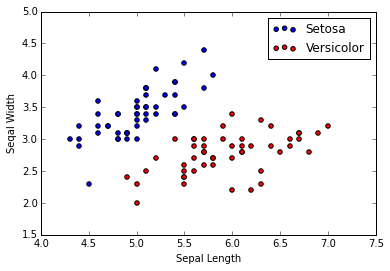

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

data = datasets.load_iris()
X = data.data[:100, : 2]
y = data.target[:100]
setosa = plt.scatter(X[:50, 0], X[:50, 1], c='b')
versicolor = plt.scatter(X[50:, 0], X[50:, 1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Seqal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))

## Sigmoid Function

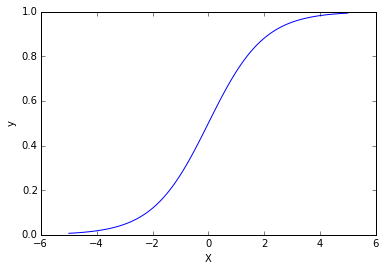

In [3]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.xlabel("X")
plt.ylabel("y")

## Algorithm Gradient Descent

In [6]:
def sigmoid(theta, x):
    return 1.0 / (1 + np.exp(-x.dot(theta)))

In [9]:
def cost_function(theta, x, y):
    h_theta = sigmoid(theta, x)
    y = np.squeeze(y)
    first = y * np.log(h_theta)
    second = (1 - y) * np.log(1 - h_theta)
    return np.mean(-first - second)

In [10]:
def gradient(theta, x, y):
    first_part = sigmoid(theta, x) - np.squeeze(y)
    return first_part.T.dot(x)

In [11]:
def gradient_descent(theta, X, y, alpha=0.001, converge=0.001):
    # attribute normailization
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    cost_iter = []
    # initial cost for given theta
    cost = cost_function(theta, X, y)
    cost_iter.append([0, cost])
    i = 1
    while(cost > converge):
        theta -= alpha * gradient(theta, X, y)
        cost = cost_function(theta, X, y)
        cost_iter.append([i, cost])
        i += 1
    return theta, np.array(cost_iter)

In [12]:
def predict_function(theta, x):
    # normailization
    x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
    pred_prob = sigmoid(theta, x)
    pred_value = np.where(pred_prob >= 0.5, 1, 0)
    return pred_value

## Test

In [13]:
shape = X.shape[1]
print shape

2


In [15]:
thetas = np.zeros(shape)
print thetas

[ 0.  0.]


In [16]:
print y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
y_flip = np.logical_not(y)
print y_flip

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


In [18]:
fitted_values, cost_iter = gradient_descent(thetas, X, y_flip)
print fitted_values

[-16.58033139  13.21630584]


In [19]:
print cost_iter

[[  0.00000000e+00   6.93147181e-01]
 [  1.00000000e+00   6.68563379e-01]
 [  2.00000000e+00   6.45427910e-01]
 ..., 
 [  2.11449000e+05   4.65456040e-03]
 [  2.11450000e+05   4.65455298e-03]
 [  2.11451000e+05              nan]]


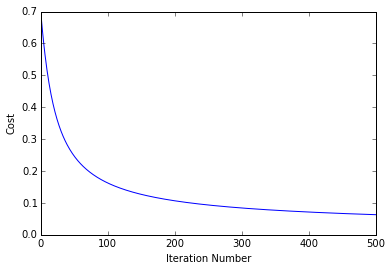

In [29]:
plt.plot(cost_iter[:501,0], cost_iter[:501,1])
plt.xlabel("Iteration Number")
plt.ylabel("Cost")

In [23]:
print type(cost_iter)

<type 'numpy.ndarray'>


## Scikit-Learn LG

In [30]:
from sklearn import linear_model
logModel = linear_model.LogisticRegression()
logModel.fit(X, y_flip)
print logModel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [31]:
print logModel.coef_

[[-2.21657376  3.69152337]]
